In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 100)

In [ ]:
df = pd.read_csv("books.csv", encoding="ISO-8859-1")

# DATA CLEANING

In [ ]:
df.shape

In [ ]:
df.head(20)

In [ ]:
# Checking the datatypes
df.dtypes
# "average_rating" column seems to be object. Lets change it into float.
#df["average_rating"] = df["average_rating"].astype(float)
# Checking again.
df.dtypes

In [ ]:
# Get the non-NA values in column "err"
non_na_values = df["err"].notna()
# Filter the DataFrame to get only the rows with non-NA values in column A
df_non_na = df[non_na_values]
df_non_na

In [ ]:
# Making a list of indexes to drop the rows.
indexes_of_rows_to_drop = list(df_non_na.index)
indexes_of_rows_to_drop
# Dropping these rows
df = df.drop(index=[3348, 4702, 5877, 8979])

In [ ]:
# Get the non-NA values in column "err"
non_na_values = df["err"].notna()
# Filter the DataFrame to get only the rows with non-NA values in column "err"
df_non_na = df[non_na_values]
df_non_na

In [ ]:
# Checking "err" column again to see if there are any other values than NaN.
df["err"].isna().value_counts()
# Dropping "err" column because it is an artificial column I just created to import the dataframe.
df.drop(["err"], axis = 1, inplace = True)

In [ ]:
# "isbn" column is just another unique number to identify the book, the International Standard Book Number.
# "isbn13" column is same but with 13 digits.
# I don't need other identification numbers for the books dataset so I drop these two columns.
df.drop(["isbn","isbn13"], axis = 1, inplace = True)
df.head()

In [ ]:
# Seems like num_pages has some spaces in the column names. Lets strip all column names so we have no whitespaces before and after.
df.columns = df.columns.str.strip()

In [ ]:
# Now able to change the datatype of "average_rating" to float.
df["average_rating"] = df["average_rating"].astype(np.float64)
# Changing the Number of Pages column "num_pages" to int.
df["num_pages"] = df["num_pages"].astype(np.int64)

In [ ]:
display(df.head(10))
df.dtypes

In [ ]:
# Lets check if all publication dates are in DD/MM/YYYY format to fix all of them.
df["publication_date"].tail(15)

In [ ]:
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
df.tail(15)

In [ ]:
# Checking NaT (Not a Time) rows to fix.
invalid_rows = df['publication_date'].isna()
print(df.loc[invalid_rows, 'publication_date'])

In [ ]:
# Fixing two cells where the publication_date is corrupted.
df.loc[8180, 'publication_date'] = pd.to_datetime('1999-01-01')
df.loc[11098, 'publication_date'] = pd.to_datetime('1975-01-01')

In [ ]:
# All datatypes are fixed now.
display(df.dtypes)
df.head()

In [ ]:
# Checking for missing values in the dataframe.
df.isna().sum()
# No missing values are found.

In [ ]:
df['language_code'].unique()

In [ ]:
df['language_code'].value_counts()

In [ ]:
# Fixing the Language Codes and unifying them. Changing language codes to language names.
# Dictionary that consists Language codes to Language names.
lang_dict = {
    'eng': 'English',
    'en-US': 'English',
    'en-GB': 'English',
    'en-CA': 'English',
    'enm': 'Middle English',
    'fre': 'French',
    'ger': 'German',
    'spa': 'Spanish',
    'jpn': 'Japanese',
    'por': 'Portuguese',
    'lat': 'Latin',
    'grc': 'Ancient Greek',
    'ita': 'Italian',
    'zho': 'Chinese',
    'rus': 'Russian',
    'swe': 'Swedish',
    'msa': 'Malay',
    'nl': 'Dutch',
    'glg': 'Galician',
    'srp': 'Serbian',
    'tur': 'Turkish',
    'gla': 'Scottish Gaelic',
    'wel': 'Welsh',
    'ara': 'Arabic',
    'nor': 'Norwegian',
    'ale': 'Aleut',
    'mul': 'Multiple Languages'
}



# Replacing language codes with language names.
df['language_name'] = df['language_code'].replace(lang_dict)

# Dropping language code column.
df.drop(["language_code"], axis=1, inplace=True)

df['language_name'].value_counts()

In [ ]:
df.head()

In [ ]:
one_author_df = df.copy()

In [ ]:
one_author_df["authors"]

In [ ]:
# Checking if there are any duplicate rows.
df.duplicated().sum()

In [ ]:
# Data validation on "publication_date"
# 91 publication dates has to be fixed, actually the dates are almost correct put the century has to be 20th century instead of the 21th century.
df[df["publication_date"] > "2021-01-01"]
# Subtract 100 years from dates greater than 2021-01-01 because they are supposed to be in 20th century.
df.loc[df['publication_date'] > '2021-01-01', 'publication_date'] -= pd.DateOffset(years=100)

In [ ]:
def splitting_string(text):
    first_author = text.split('/')
    return first_author[0]

one_author_df['only_author'] = one_author_df['authors'].apply(lambda x : splitting_string(x))

one_author_df

In [ ]:
#one_author_df[["title","only_author"]].loc[100:]
one_author_df["average_rating"].value_counts()
# I want to do EDA on these so I will keep. If I intend to remove, I can remove before my machine model.

In [ ]:
import pickle
# Loading pickle file into dictionary.
with open('extract5.pkl', 'rb') as handle:
    loaded_dictionary = pickle.load(handle)
    print('dictionary loaded successfully to variable')

loaded_dictionary

In [ ]:
# Loading final genres dictionary.
%store -r final_genres_dictionary

In [ ]:
len(final_genres_dictionary)

In [ ]:
# Dropping old authors column that has multiple names.
one_author_df.drop(["authors"], axis = 1, inplace = True)
one_author_df.head()

In [ ]:
# Renaming the new "only_author" column to "author".
one_author_df.rename(columns = {'only_author':'author'}, inplace = True)

In [ ]:
# Convert the 'bookID' column to strings and apply the mapping
one_author_df['genre'] = one_author_df['bookID'].astype(str).map(final_genres_dictionary)
# Now I have genres of all the books, and for the missing ones it is labeled as blank.

In [ ]:
one_author_df.head(2500)

In [ ]:
one_author_df["author"].value_counts()
# 374 blank genres.
one_author_df[one_author_df["genre"] == "blank"]

In [308]:
df = one_author_df

# Saving the cleaned dataframe to a csv.
'''
one_author_df.to_csv("clean_data.csv")
'''

'\none_author_df.to_csv("clean_data.csv")\n'

In [225]:
import pandas as pd
from fuzzywuzzy import process
from fuzzywuzzy import fuzz
import warnings
warnings.filterwarnings('ignore')

# Get the unique publishers
publishers = df_pub['publisher'].unique()

matches = pd.DataFrame(columns=['source', 'target', 'score'])

for i, source in enumerate(publishers):
    targets = [p for j, p in enumerate(publishers) if j != i]
    results = process.extract(source, targets, scorer=fuzz.token_sort_ratio)
    matches = matches.append(pd.DataFrame({'source': source, 'target': [r[0] for r in results], 'score': [r[1] for r in results]}))

In [314]:
df["publisher"].nunique()
# df_pub means DataFrame publishers, I will try to fix the publishers on this variable.
df_pub = df

In [315]:
df_pub['publisher'] = df_pub['publisher'].replace({"W.W. Norton & Company": "W.W. Norton & Company (NYC)", "Bloomsbury Childrens Books": "Bloomsbury Children's Books", "Penguin Classics Deluxe Edition":"Penguin Books", })
df_pub

,bookID,title,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,publisher,language_name,author,genre
0,1,Harry Potter and the Half-Blood Prince (Harry ...,4.57,652,2095690,27591,2006-09-16,Scholastic Inc.,English,J.K. Rowling,Fantasy
1,2,Harry Potter and the Order of the Phoenix (Har...,4.49,870,2153167,29221,2004-09-01,Scholastic Inc.,English,J.K. Rowling,Fantasy
2,4,Harry Potter and the Chamber of Secrets (Harry...,4.42,352,6333,244,2003-11-01,Scholastic,English,J.K. Rowling,Fantasy
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,435,2339585,36325,2004-05-01,Scholastic Inc.,English,J.K. Rowling,Fantasy
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,2690,41428,164,2004-09-13,Scholastic,English,J.K. Rowling,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,4.06,512,156,20,2004-12-21,Da Capo Press,English,William T. Vollmann,Fiction
11123,45633,You Bright and Risen Angels,4.08,635,783,56,1988-12-01,Penguin Books,English,William T. Vollmann,Fiction
11124,45634,The Ice-Shirt (Seven Dreams #1),3.96,415,820,95,1993-08-01,Penguin Books,English,William T. Vollmann,Historical Fiction
11125,45639,Poor People,3.72,434,769,139,2007-02-27,Ecco,English,William T. Vollmann,Nonfiction


In [304]:
matches_filtered = matches[matches['score'] < 100]
matches_sorted = matches_filtered.sort_values(by='score', ascending=False)
matches_sorted.head(100)

,source,target,score
0,W.W. Norton & Company (NYC),W.W. Norton & Company (NY),98
0,Bloomsbury Children's Books,Bloomsbury Childrens Books,98
0,Penguin Classics Deluxe Editions,Penguin Classics Deluxe Edition,98
0,Ãditions de L'Olivier,Editions de l'Olivier,98
0,St. Martin's Paperbacks,St. Martin's Paperback,98
0,Bloomsbury Childrens Books,Bloomsbury Children's Books,98
0,Editions de l'Olivier,Ãditions de L'Olivier,98
0,St. Martin's Paperback,St. Martin's Paperbacks,98
0,HarperCollins Publishers,HarperCollinsPublishers,98
0,Dover Publications (NY),Dover Publications (NYC),98


In [396]:
# Fixing publisher names

#df_pub.loc[df_pub["publisher"].str.contains("Penguin"), "publisher"] = "Penguin Books"
#df_pub.loc[df_pub["publisher"].str.contains("Scholastic"), "publisher"] = "Scholastic"
#df_pub.loc[df_pub["publisher"].str.contains("Harper"), "publisher"] = "HarperCollins"
#df_pub.loc[df_pub["publisher"].str.contains("Orion Publishing"), "publisher"] = "Orion Publishing Group"
#df_pub.loc[df_pub["publisher"].str.contains("Princeton University Press"), "publisher"] = "Princeton University Press"
#df_pub.loc[df_pub["publisher"].str.contains("Book Publishing Co"), "publisher"] = "Book Publishing Company"
#df_pub.loc[df_pub["publisher"].str.contains("Vintage"), "publisher"] = "Vintage Books"
#df_pub.loc[df_pub["publisher"].str.contains("Random House"), "publisher"] = "Random House"
#df_pub.loc[df_pub["publisher"].str.contains("Puffin"), "publisher"] = "Puffin Books"
#df_pub.loc[df_pub["publisher"].str.contains("Mariner"), "publisher"] = "Mariner Books"
#df_pub.loc[df_pub["publisher"].str.contains("Ballantine"), "publisher"] = "Ballantine Books"
#df_pub.loc[df_pub["publisher"].str.contains("Simon & Schuster"), "publisher"] = "Simon & Schuster"
#df_pub.loc[df_pub["publisher"].str.contains("Pocket Star"), "publisher"] = "PPP Star Books"
#df_pub.loc[df_pub["publisher"].str.contains("Pocket"), "publisher"] = "Pocket Books"
#df_pub.loc[df_pub["publisher"].str.contains("PPP Star Books"), "publisher"] = "Pocket Star Books"
#df_pub.loc[df_pub["publisher"].str.contains("Bantam"), "publisher"] = "Bantam Books"
#df_pub.loc[df_pub["publisher"].str.contains("VIZ"), "publisher"] = "VIZ Media"
#df_pub.loc[df_pub["publisher"].str.contains("Bantam"), "publisher"] = "Bantam Books"
#df_pub.loc[df_pub["publisher"].str.contains("Underwood/Miller"), "publisher"] = "Underwood/Miller"
#df_pub.loc[df_pub["publisher"].str.contains("Berkley"), "publisher"] = "Berkley"
#df_pub.loc[df_pub["publisher"].str.contains("Dover"), "publisher"] = "Dover Publications"
#df_pub.loc[df_pub["publisher"].str.contains("Collins Modern Classics"), "publisher"] = "HarperCollins"
#df_pub.loc[df_pub["publisher"].str.contains("Modern Lib"), "publisher"] = "Modern Library"
df_pub.loc[df_pub["publisher"].str.contains("Del Rey"), "publisher"] = "Del Rey"

In [397]:
# Filtering by string and checking publisher names.
filtered_df = df_pub[df_pub['publisher'].str.contains("Del Rey")]
filtered_df
filtered_df["publisher"].value_counts()

Del Rey    116
Name: publisher, dtype: int64

# EDA (Explanatory Data Analysis)

In [ ]:
# df to do EDA.
df_cleaned.head(100)

In [157]:
# Getting only numerical columns for heatmap.
df_numeric = df.select_dtypes(include=np.number)
df_numeric.drop("bookID", axis=1, inplace=True)

,average_rating,num_pages,ratings_count,text_reviews_count
0,4.57,652,2095690,27591
1,4.49,870,2153167,29221
2,4.42,352,6333,244
3,4.56,435,2339585,36325
4,4.78,2690,41428,164
...,...,...,...,...
11122,4.06,512,156,20
11123,4.08,635,783,56
11124,3.96,415,820,95
11125,3.72,434,769,139


<AxesSubplot: >

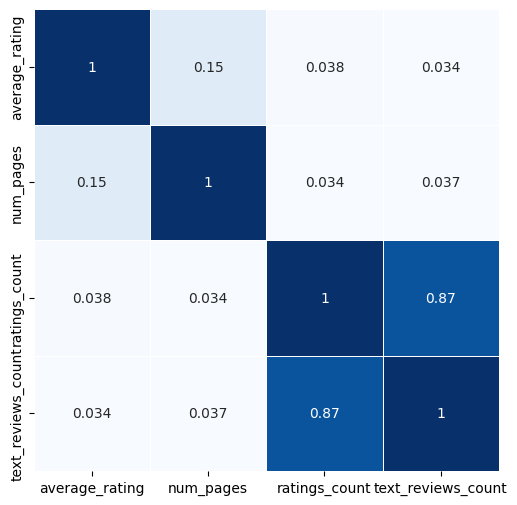

In [191]:
plt.figure(figsize=(6,6))
sns.heatmap(df_numeric.corr(),
                cbar=False,
                square=False,
                annot=True,
                cmap='Blues',
                linewidths=0.5)

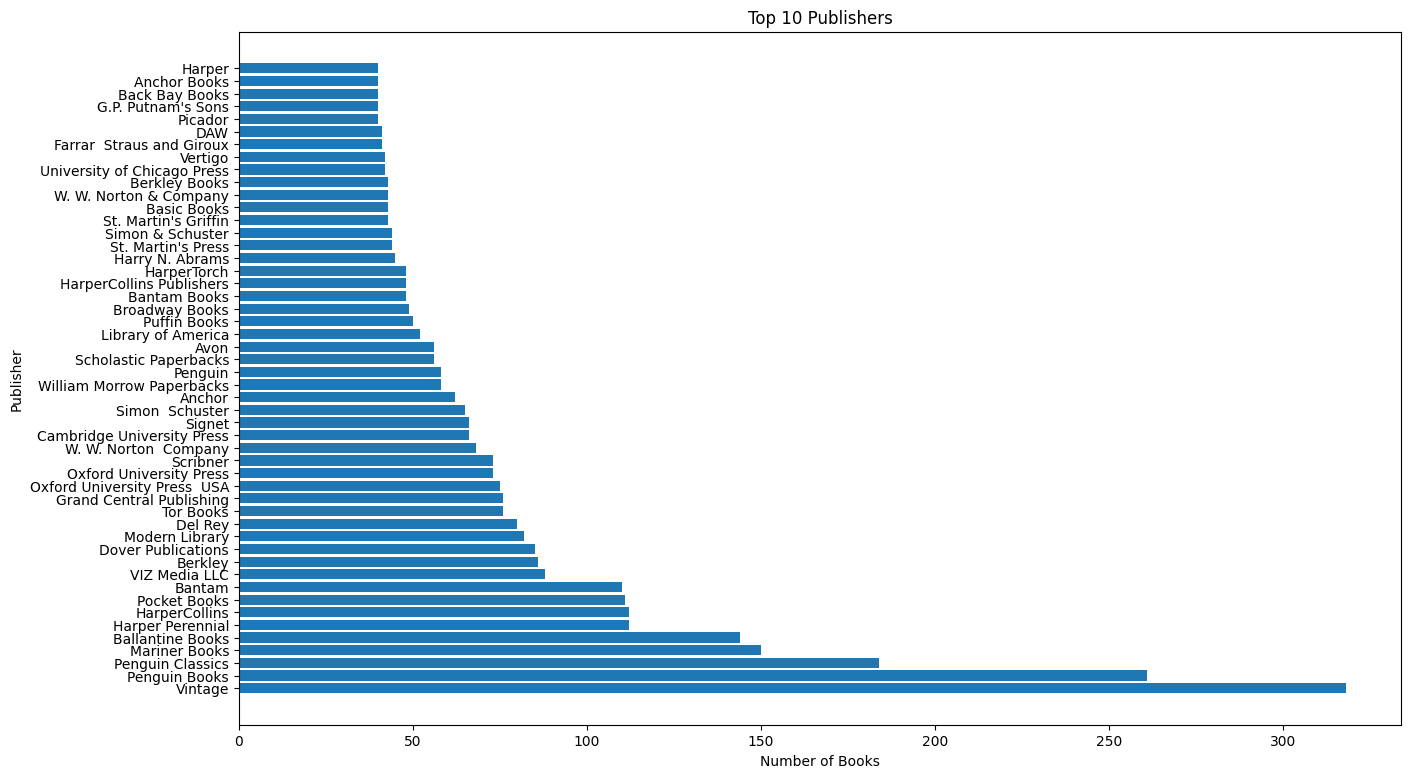

In [265]:
top_publishers = df_cleaned['publisher'].value_counts().head(50)

plt.figure(figsize=(15, 9))

plt.barh(top_publishers.index, top_publishers.values)
plt.title('Top 10 Publishers')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()

<AxesSubplot: ylabel='publisher'>

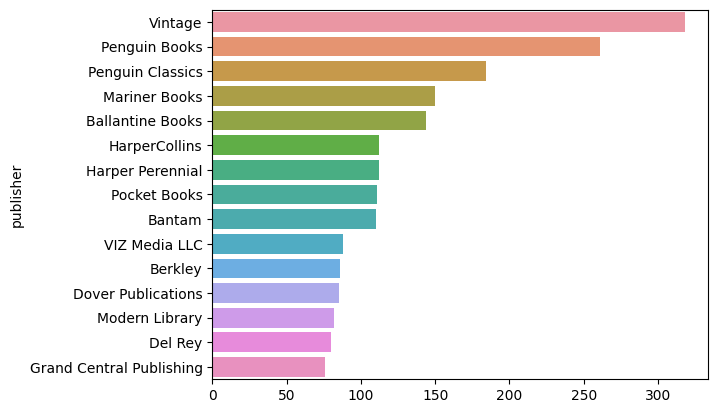

In [269]:
publisher = df_cleaned.value_counts('publisher').sort_values(ascending=False).head(15)
sns.barplot(y=publisher.index,x = publisher)

In [206]:
df['authors'].value_counts().head(10)

Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Piers Anthony       30
Sandra Brown        29
Mercedes Lackey     29
Dick Francis        28
Terry Pratchett     23
Name: authors, dtype: int64